In [33]:
#Import necessary libs
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [34]:
def create_towns(random=1,size=10):
    '''
    Description: Create a df of towns and their Coordinates by manual input or random generation
    
    Parameters: if 'random'=1 then random generation is applied and 'size' must be specified (else assumed as =10)
                if random=0 then hardcoded town data is used
    
    Returns: df:towns - a dataframe of towns coordinates with town names as the row index and 'x' and 'y' as column indices.
    
    
    Rick Comments:
        Figure out why that NAN row is there are how to create a df in a way that does not require it to be deleted
    
    '''
    
    
    if random==1:
        #setup df and column index
        Towns_To_Visit=pd.DataFrame(index=np.arange(1), columns=['x','y'])

        # Create the random cities (use name as row index) and their coordinates
        Num_Cities=size
        for i in range (Num_Cities):
            city_name= str('city'+str(float(i)))
            Towns_To_Visit.loc[city_name]=[abs(int(np.random.randn()*100)),abs(int(np.random.randn()*100))]

        #get rid of NAN row - ARG
        Towns_To_Visit.dropna(inplace=True)
        #display df:
#         print(Towns_To_Visit)
        
    elif random==0:
        Towns_To_Visit=pd.DataFrame(data=np.array([[12,53],[12,54],[912,996],[8,90],[3,4]]),index=['Jhb','Pta','Cpt','Dbn','Blm'], columns=['x','y'])
#         print(Towns_To_Visit)

    towns=Towns_To_Visit
    return towns


In [35]:
def clear_population(indicator):
    '''
    Description: Clear all info regarding towns and their coordinates - this could be used for UI
    
    Parameters: if 'indicator'=1 then clear, if 'indicator'=0 then dont clear, else give error message
    
    Returns: nothing, but it can clear the Towns_To_Visit df, so watch out!
    
    Rick Comments:
        figure out what the .iloc[0:0] method does not work.
        Play around with this and user input
    
    '''
    
    
#     Towns_To_Visit.iloc[0:0] #why does this not work?!
    if indicator ==0:
        print('The existing population was not cleared')
        pass
    elif indicator==1:
        Towns_To_Visit.drop(Towns_To_Visit.index, inplace=True)
        print('The population has been cleared')
    else:
        print('The argument you passed to the function `clear_population` was not understood')

In [36]:
def generate_TFM():
    '''
    Description: generate a df with To-From data for all of the cities in the 'Towns_To_Visit' df
    
    Parameters: none, but the 'Towns_To_Visit' df should have some data in it
    
    Returns: df:TFM_return - a matrix containing the distances between the towns in the 'Towns_To_Visit' df
    
    Rick Comments:
        -This is quite obvioulsy a bad way of doing things. imagine how big this df will get if you have 100 cities
            on top of ^^^ both sides of the matrix are filled, which means you are doing double the work all for easier indexing.
        -this method was used because I was following the textbook which solves things by hand.
        -redo this as a function which is passed two cities and then returns the distance between them(easy enough)
            use ^^^ function in subseqent code (will require a pretty big rework. Will be time intensive but not difficult)
        -...but is the logic above true? I refer to this matrix SO often! Maybe it does make sense to do all of the calcs
            and then just refer to them, instead of redoing the same calcs many times...? think about this
        -TFM is a pretty terrible name. Think more about names in future
    '''
    
    #Create empty matrix of apropriate size
    TFM = pd.DataFrame(index=Towns_To_Visit.index, columns=Towns_To_Visit.index)
    TFM = TFM.fillna(0)

    #determine counter size from size of Towns_To_Visit matrix
    count_to=Towns_To_Visit.shape[0]

    #run counter. i is index, j is column - with a bit of effoft this computation can be halved, as the "top" half of the TFM is just a transposed "bottom" half
    for i in range(count_to):
        for j in range(count_to):

            #determine X and Y distances between given points
            xDist=abs((Towns_To_Visit.loc[TFM.index[i]]['x'])-(Towns_To_Visit.loc[TFM.columns[j]]['x']))
            yDist=abs((Towns_To_Visit.loc[TFM.index[i]]['y'])-(Towns_To_Visit.loc[TFM.columns[j]]['y']))

            #determine direct distance between given points(hypoteneus)
            distance=np.sqrt((xDist**2)+(yDist**2))

            #set given cell of TFM matrix to the calculated distance
            TFM.iloc[i][j]=distance


    #Check that it works by using values from a worked Textbook example -- yay, it worked!    
#     TFM.drop(TFM.index, inplace=True)
#     TFM.reset_index(drop=True)
#     TFM = pd.DataFrame(index=Towns_To_Visit.index, columns=Towns_To_Visit.index)
#     TFM = TFM.fillna(0)
#     TFM.iloc[0]=[0,132,217,164,58]
#     TFM.iloc[1]=[132,0,290,201,79]
#     TFM.iloc[2]=[217,290,0,113,303]
#     TFM.iloc[3]=[164,201,113,0,196]
#     TFM.iloc[4]=[58,79,303,196,0]
#     print(TFM) 
    
    TFM_return=TFM
    return TFM_return

In [37]:
def run_random():
    '''
    Description: generates a 'tour' of all cities in random order. Visiting each city only once, except for the final return to the start city
    
    Parameters: none, but requires the 'Towns_To_Visit' df to be populated
    
    Returns: df:randomized - a single row df representing a single 'tour'
    
    Rick Comments:
        -I am pretty sure that my understanding of df's and how to work with them is serioulsy limmited.
        There MUST be a better way to do this - how can I append a series to a df without converting the series to a df?
    '''
    
    randomized=Towns_To_Visit.sample(Towns_To_Visit.shape[0])
    #determine the home_town
    home_town=randomized.index[0]

    #make df out of randomly aranged index
    randomized=pd.DataFrame(randomized.index)

    #add the return journey
    add_at=(randomized.shape[0])
    randomized.loc[add_at]=home_town
    randomized=randomized.transpose()
    return randomized



def generate_population(size):
    '''
    Description: Generate starting population by creating a df that contains a number of random 'tours'
    
    Parameters: int:size - how big do you want the population to be?
    
    Returns: df:popu - a df containing a 'size' number of tours
    
    Rick Comments:
        This is SUCH a great place to incorporate the Nearest Neighbor Heuristic! Don't just take a random starting pop,
        rather start with the results of the NNH!
    '''
    
    count_cities=Towns_To_Visit.shape[0]+1
    popu=pd.DataFrame(index=np.arange(1), columns=np.arange(count_cities))

    size_of_pop = size
    for i in range (size_of_pop):
        result=run_random()
        popu=popu.append(result)
        popu=popu.reset_index(drop=True)
    
    popu.drop(popu.index[0], inplace=True)
    popu=popu.reset_index(drop=True)
    return popu

In [38]:
#Define function that calculates the fitness of a populatio that is passed to it
def determine_fitness(pop):
    '''
    Description: calculate the fitness of a population that is passed to it 
    
    Parameters: df:pop
    
    Returns: df:pop_fitness
    
    Rick Comments:
        -if you get rid of the TFM then this function will be significantly influenced. Consider pro's and con's
    
    '''
    
    #Create a df where fitness of pop can be stored
    fitness=pd.DataFrame(index=np.arange(1), columns=np.arange(1))
    
    #Determine size of population
    pop_size=pop.shape[0]
    
    #loop over each tour in the population
    for j in range(pop_size):
        individual=pop.iloc[[j]]
        individual_size=individual.shape[1]-1  #determine how many stops there are along the way (the -1 is to disregard the return journey)
    
        individual_fitness=0
        #loop over all stops for the given tour
        for i in range (individual_size):
            current_town=individual.loc[j,i]
            next_town=individual.loc[j,i+1]
            dist_to_next=TFM.loc[current_town,next_town]
            individual_fitness += dist_to_next

        fitness.loc[j]=individual_fitness
    
    pop_fitness= fitness
    return pop_fitness

    

In [39]:
def mutate(route):
    '''
    Description: randomly switch two cities in a given tour
    
    Parameters: df:route
    
    Returns: df:mutation
    
    Rick Comments:
        -it is possible for a city to replace itself and no mutation to occur - improve on this
            ^^ the more cities there are, the less chance there is of this happening
        -When trying to switch values I ran into some serious problems with referencing/viewing vs copying of values.
            I ended up (secretly) dropping to an array to do the manipulations before (secretly) returning back to a df.
            I believe that I know how to do this properly now, with the .copy() function, but I should get some advise
                on best practices here.
    
    '''
    #determine length of route
    route_len=route.shape[1]

    #determine positions to be switched
    pos1=np.random.randint(1,route_len-1)
    pos2=np.random.randint(1,route_len-1)

    #sectretly drop down to an array in numpy because I dont know how to do this in a df
    route=np.array(route)

    #make the switch
    route[:, [pos1,pos2]] =route[:, [pos2,pos1]]

    #secretly convert back to a df before anybody realizes
    route=pd.DataFrame(route)

    mutation=route
    return mutation



In [40]:
#Crossover/Breed. Once again there is a chance of the start_point=end_point; no time to add logic now
# I AM SO ASHAMED OF THE MESS I MADE HERE! I NEED TO LEARN HOW TO DO THIS BETTER AND THEN REDO IT! I HAVE SO MUCH TO LEARN!

def breed_and_mutate(mrate=0.7):
    '''
    Description: Crossover/Breed two 'parent' tours
    
    Parameters: int:mrate - the rate at which mutation should occur. default set to 0.7 becuase I want it to happen a lot
    
    Returns: none, but transforms the 'population' df
    
    Rick Comments:
    -I AM SO ASHAMED OF THE MESS I MADE HERE! I NEED TO LEARN HOW TO DO THIS BETTER AND THEN REDO IT! I HAVE SO MUCH TO LEARN!
        If anybody ever goes through this code... I am sorry for the torture that I have put you through!
        
    -Once again there is a chance of the start_point=end_point and nothing happening; no time to add logic now
    -How could I have worked with the parent df more elegantly?
        -how could I have looped twice between the relevant series in the df without repeating the loop?
    -a lot of repetitive loops are used!
        Think of how you could have user a 'derailing' approach to insertion instead starting from zero(see in-row comments)
        Think of how to loop between children istead of repeating code
    '''
    
    
    global population

    #seperate parents from the parent df
    parent1=parents.loc[0]
    parent2=parents.loc[1]

    #randomly determine crossover start/stop points
    start_stop1 = np.random.randint(1,(len(parent1)-2))                        
    start_stop2 = np.random.randint(1,(len(parent1)-2))
    start_point=min(start_stop1,start_stop2)
    end_point=max(start_stop1,start_stop2)
    
    #prepare children df and clear the genes between the start and stop points
    child1=parent1.copy()
    child2=parent2.copy()

    for i in range(start_point, end_point):
        child1.loc[i]="NO-GENE"

    for i in range(start_point, end_point):
        child2.loc[i]="NO-GENE"


    #Insertion for child1 - I sort of cheated here by running through the parent genes from o-len instead of stating at 'start_point'
    for i in range(start_point,end_point):

        #Replace child1 empty genes with the gene from other parent
        for j in range(0,len(parent1)):

            if child1.str.contains(parents.loc[1,j]).any(axis=None):
#                 print('parent gene already in child - no crossover')
                pass
            else:               
#                 print('parent gene not in child - crossover')
                child1[i]=parents.loc[1,j]
                break


    #mutation for child1 (if triggered by mrate)
    if np.random.random() <mrate:
        #pass the first child through for mutation
        child1=pd.DataFrame(child1).transpose()
        mutant1=mutate(child1)
        
        #append the mutant to the population table
        population=population.append(mutant1)
        population=population.reset_index(drop=True)

    #if no mutation then append the child (this is now the child without mutation)
    else:
        population=population.append(child1)
        population=population.reset_index(drop=True)



    #I now repeat everythig for child2... there is definitely a better way of doing this!
    
    #Insertion for child2- I sort of cheated here by running through the parent genes from o-len instead of stating at 'start_point'
    for i in range(start_point,end_point):
        
        #Replace child2 empty genes with the gene from other parent
        for j in range(0,len(parent1)):

            if child2.str.contains(parents.loc[0,j]).any(axis=None):
#                 print('parent gene already in child - no crossover')
                pass

            else:
#                 print('parent gene not in child - crossover')
                child2[i]=parents.loc[0,j]
                break

        
    #mutation for child2 (if triggered by mrate)
    if np.random.random() <mrate:
        #pass the second child through for mutation
        child2=pd.DataFrame(child2).transpose()
        mutant2=mutate(child2)
        
        #append the mutant to the population table
        population=population.append(mutant2)
        population=population.reset_index(drop=True)

    #if no mutation then append the child (this is now the child without mutation)
    else:
        population=population.append(child2)
        population=population.reset_index(drop=True)
        
    
#THANK GOODNESS THAT'S OVER. IF ANYBODY EVER READS THIS... I AM SORY FOR WHAT I HAVE PUT YOU THROUGH!
#I HAVE STRUNG QUITE A FEW LATE NIGHTS TOGETHER, AND THOUGH I AM STOKED THAT THE CODE ACTUALLY WORKS... IT'S QUITE A MESS!


Your resulting population is:
         0        1        2         3         4        5        6        7   \
0  city16.0  city3.0  city0.0  city19.0  city15.0  city9.0  city2.0  city6.0   
1  city16.0  city3.0  city0.0  city15.0  city19.0  city9.0  city2.0  city6.0   
2  city16.0  city3.0  city0.0  city19.0  city15.0  city9.0  city2.0  city6.0   
3  city16.0  city3.0  city0.0  city19.0  city15.0  city9.0  city2.0  city6.0   
4  city16.0  city3.0  city0.0  city15.0  city19.0  city9.0  city2.0  city6.0   
5  city16.0  city3.0  city0.0  city15.0  city19.0  city9.0  city2.0  city6.0   

         8        9     ...          11       12        13        14  \
0  city11.0  city1.0    ...     city4.0  city5.0  city12.0  city14.0   
1  city11.0  city1.0    ...     city4.0  city5.0  city12.0  city14.0   
2  city11.0  city1.0    ...     city4.0  city5.0  city12.0  city14.0   
3  city11.0  city1.0    ...     city4.0  city5.0  city12.0  city14.0   
4  city11.0  city1.0    ...     city4.0  city5.0

<function matplotlib.pyplot.show(*args, **kw)>

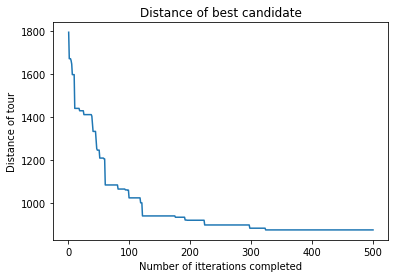

In [42]:

'''
    Description:
    This is the last block of code. It calls all of the above functions in order to solve a TSP, with arguments defined in-line.
    I still need to package this into a single pretty function, but rather than making it pretty, I have spent my time playing
    with the code and trying to learn more. I find it easier to leave this as an open block of code while still testing it.
      
    Parameters would be: rand, num_towns, population_size, num_gen, mrate
    
    Returns: would not return anything, but would print out the results.
    
    Rick Comments:
    I feel as though I have reached a point of deminishing returns with this project. Although there is still SO much room
    for improvement, I think that my time would be better spent applying my learning to a new project (I have another
    optimization problem in mind. It is a replenishment order optimizer for one of my clients, I have already built the tool
    with Solver in Excel, and I think it is very well suited to Python.)
    '''

#Randomly create towns to visit:
num_towns=20
rand=1
Towns_To_Visit=create_towns(rand,num_towns)

#generate the To-From Matrix:
TFM=generate_TFM()

# Create a sample population of appropriate size:
population_size=6
population=generate_population(population_size)

#create a df to track the total distance of the fittest known route
fittest_known=pd.DataFrame(index=np.arange(1), columns=np.arange(1))

# Breed for the desired number of generations
num_gen=500
for i in range(num_gen):
    #Determine fitness of population:
    population_fitness=determine_fitness(population)
    #track fittest_known route
    fittest_known=fittest_known.append(population_fitness.nsmallest(1,0))
    fittest_known=fittest_known.reset_index(drop=True)


    #Select Parents to breed with
        #The parents are the two fittest individualts in the population
    parents_index=population_fitness.nsmallest(2,0).index
    parents=population.iloc[parents_index]
    #reset index of parents df... I still need to build in some logic to avoid having to do this here(or at all...?)
    parents=parents.reset_index(drop=True)


    #Breed with the parents and mutate their offspring at a desired rate:
    mrate=1
    breed_and_mutate(mrate)
    #in case any of the children are identical to already-existing routes: drop duplicates
    population=population.drop_duplicates()
    population=population.reset_index(drop=True)


    #determine population fittenss for population WITH children
    population_fitness=determine_fitness(population)
    #now look at the population(with the children included), and get rid of the two worst options (i.e. where fitness is longest)
        #this is to keep the size of the population constant
    winners_index=population_fitness.nsmallest(population_size,0).index
    population=population.iloc[winners_index]
    #reset index of parents df
    population=population.reset_index(drop=True)

    
#Present results in a nice way
print('\nYour resulting population is:') 
print(population)    
population_fitness=determine_fitness(population)
population_fitness.loc[0]='Route length'
print('\nThe route lengths associated with your population are:')
print(population_fitness)

print('\nThis plot shows you the distance of the best known route after a given number of itterations')
plt.plot(fittest_known)
plt.title('Distance of best candidate')
plt.ylabel('Distance of tour')
plt.xlabel('Number of itterations completed')
plt.show